In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
train_path = "../dataset/preprocessed/netflix_train.csv"
val_path = "../dataset/preprocessed/netflix_val.csv"
test_path = "../dataset/preprocessed/netflix_test.csv"

train_data = pd.read_csv(train_path)
val_data = pd.read_csv(val_path)
test_data = pd.read_csv(test_path)


max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data['title'] + ' ' + train_data['description'])

X_train = pad_sequences(tokenizer.texts_to_sequences(train_data['title'] + ' ' + train_data['description']), maxlen=max_len)
X_val = pad_sequences(tokenizer.texts_to_sequences(val_data['title'] + ' ' + val_data['description']), maxlen=max_len)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data['title'] + ' ' + test_data['description']), maxlen=max_len)


label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['target_ages'])
y_val = label_encoder.transform(val_data['target_ages'])
y_test = label_encoder.transform(test_data['target_ages'])
print(y_train.shape)
print(y_train)
print(len(y_train))
print(y_val.shape)
print(y_val)
print(len(y_val))

(6155,)
[1 2 0 ... 3 0 3]
6155
(1319,)
[3 3 0 ... 3 0 0]
1319


d:\python\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\python\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\python\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
d:\python\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
d:\python\lib\site-packages\sklearn\utils\va

In [3]:
model = keras.Sequential([
    keras.layers.Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    keras.layers.LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [4]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/20


97/97 [==============================] - 14s 114ms/step - loss: 1.1705 - accuracy: 0.4742 - val_loss: 1.0864 - val_accuracy: 0.4920
Epoch 2/20
97/97 [==============================] - 11s 113ms/step - loss: 0.8774 - accuracy: 0.5922 - val_loss: 1.0579 - val_accuracy: 0.5072
Epoch 3/20
97/97 [==============================] - 11s 113ms/step - loss: 0.5913 - accuracy: 0.7621 - val_loss: 1.2083 - val_accuracy: 0.4898
Epoch 4/20
97/97 [==============================] - 11s 115ms/step - loss: 0.3254 - accuracy: 0.8861 - val_loss: 1.6685 - val_accuracy: 0.4807
Epoch 5/20
97/97 [==============================] - 11s 115ms/step - loss: 0.1622 - accuracy: 0.9488 - val_loss: 2.0191 - val_accuracy: 0.4792
Epoch 6/20
97/97 [==============================] - 11s 114ms/step - loss: 0.0868 - accuracy: 0.9724 - val_loss: 2.4973 - val_accuracy: 0.4814
Epoch 7/20
97/97 [==============================] - 11s 113ms/step - loss: 0.0498 - accuracy: 0.9834 - val_loss: 2.6552 - val_accuracy: 0.47

In [5]:
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_test_classes = y_test


loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')

42/42 [==============================] - 1s 11ms/step
Test Loss: 4.5017
Test Accuracy: 47.65%


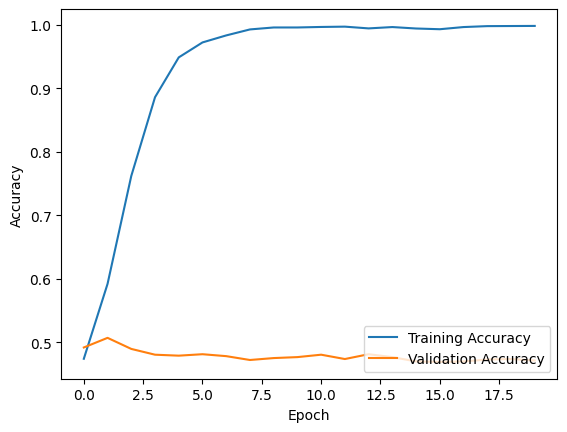

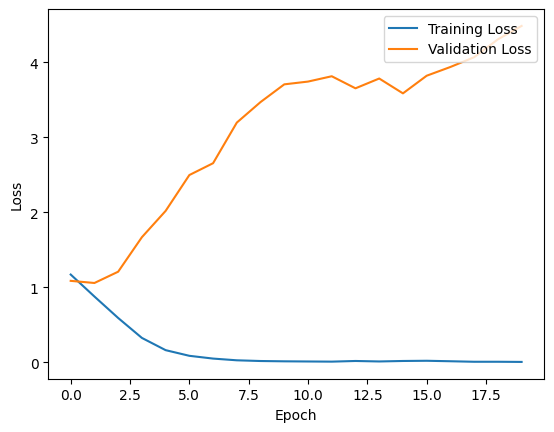

              precision    recall  f1-score   support

      Adults       0.59      0.60      0.60       614
        Kids       0.45      0.32      0.37        66
  Older Kids       0.37      0.40      0.38       242
       Teens       0.36      0.35      0.36       398

    accuracy                           0.48      1320
   macro avg       0.44      0.42      0.43      1320
weighted avg       0.48      0.48      0.48      1320



In [6]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

print(classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))